In [14]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

C:\Users\cleme\anaconda3\envs\geo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

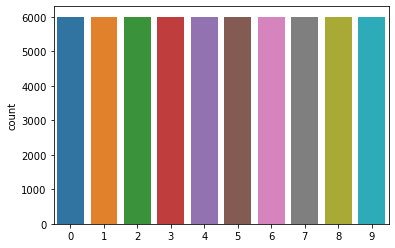

In [16]:
sns.countplot(y_train)


In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [19]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

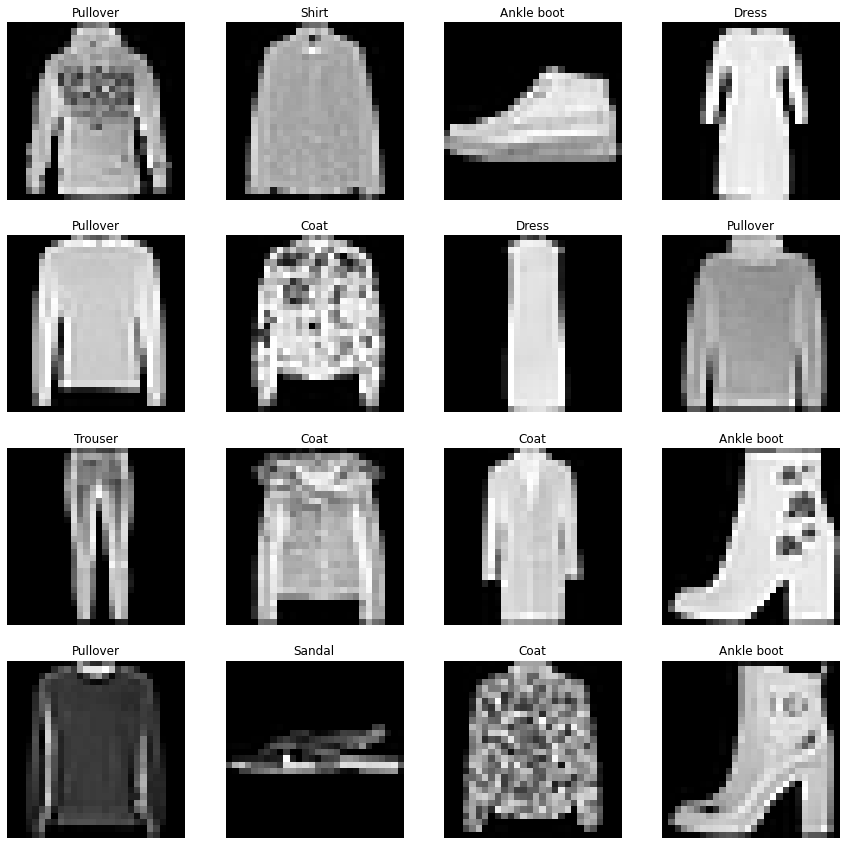

In [21]:
clothing = {0 : 'T-shirt/top', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat',
            5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}

fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(54000)
        img = x_train[index]
        cloths = y_train[index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[np.argmax(cloths)])
        axe.set_axis_off()

In [32]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [33]:
optimizer = RMSprop(learning_rate=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.001)

epochs = 50
batch_size = 86

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)
                                        

In [34]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size, callbacks=[learning_rate_reduction])

Epoch 1/50
627/627 [==============================] - 11s 17ms/step - loss: 0.7523 - accuracy: 0.7171 - val_loss: 0.4330 - val_accuracy: 0.8355
Epoch 2/50
627/627 [==============================] - 10s 16ms/step - loss: 0.5286 - accuracy: 0.8019 - val_loss: 0.3842 - val_accuracy: 0.8547
Epoch 3/50
627/627 [==============================] - 10s 17ms/step - loss: 0.4643 - accuracy: 0.8254 - val_loss: 0.3279 - val_accuracy: 0.8800
Epoch 4/50
627/627 [==============================] - 11s 17ms/step - loss: 0.4273 - accuracy: 0.8398 - val_loss: 0.3104 - val_accuracy: 0.8848
Epoch 5/50
627/627 [==============================] - 11s 17ms/step - loss: 0.4010 - accuracy: 0.8512 - val_loss: 0.2779 - val_accuracy: 0.9002
Epoch 6/50
627/627 [==============================] - 11s 17ms/step - loss: 0.3836 - accuracy: 0.8590 - val_loss: 0.3125 - val_accuracy: 0.8835
Epoch 7/50
627/627 [==============================] - 11s 17ms/step - loss: 0.3639 - accuracy: 0.8645 - val_loss: 0.2712 - val_accuracy:

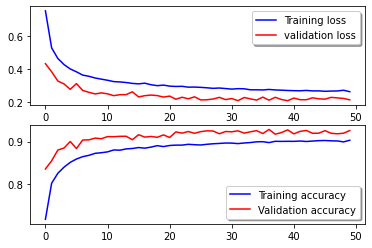

In [35]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

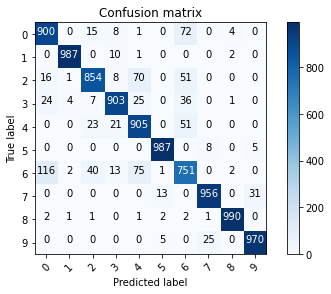

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 